# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [1]:
import pandas as pd 
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["Target"] = iris.target

### 와인 데이터

In [5]:
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["Target"] = wine.target

### 유방암 데이터

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df["Target"] = cancer.target

## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [9]:
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["Target"] = boston.target

### 당뇨병 데이터

In [11]:
diabetes = load_diabetes()

In [12]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["Target"] = diabetes.target

## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [13]:
model = DecisionTreeClassifier()

In [14]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=-1)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [15]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [16]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=-1)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 텍스트를 통한 시각화

In [17]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [18]:
r = tree.export_text(decision_tree=model,
                    feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

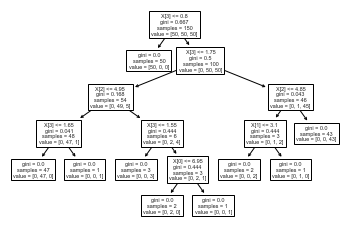

In [19]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

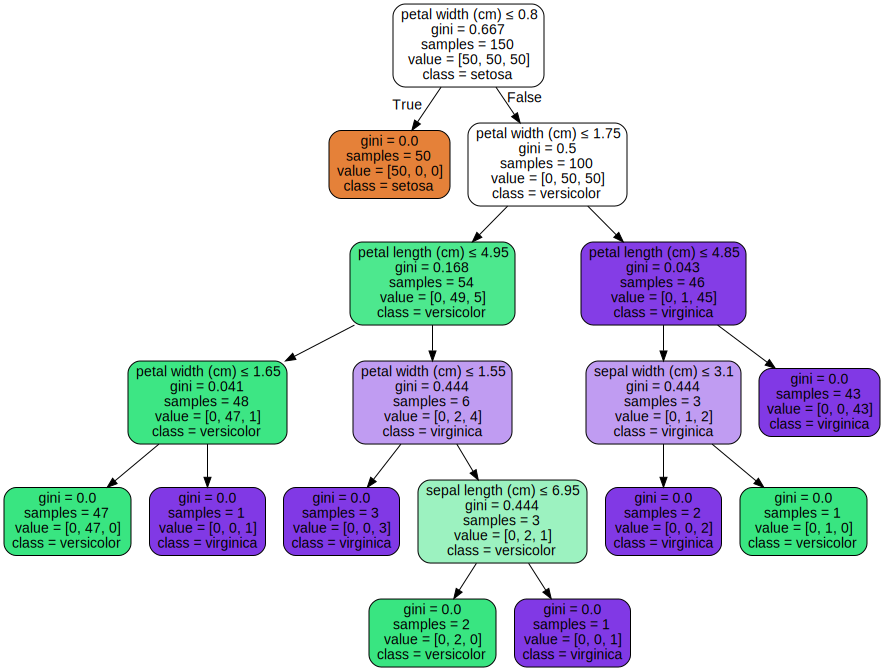

In [20]:
dot_data = tree.export_graphviz (decision_tree=model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                 # filled : 색을 칠하는주는 것 
                                 # rounded : 모서리가 둥그렇게 출력해주는 코드 
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

#### 시각화

In [29]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

##### 결정 경계 시각화

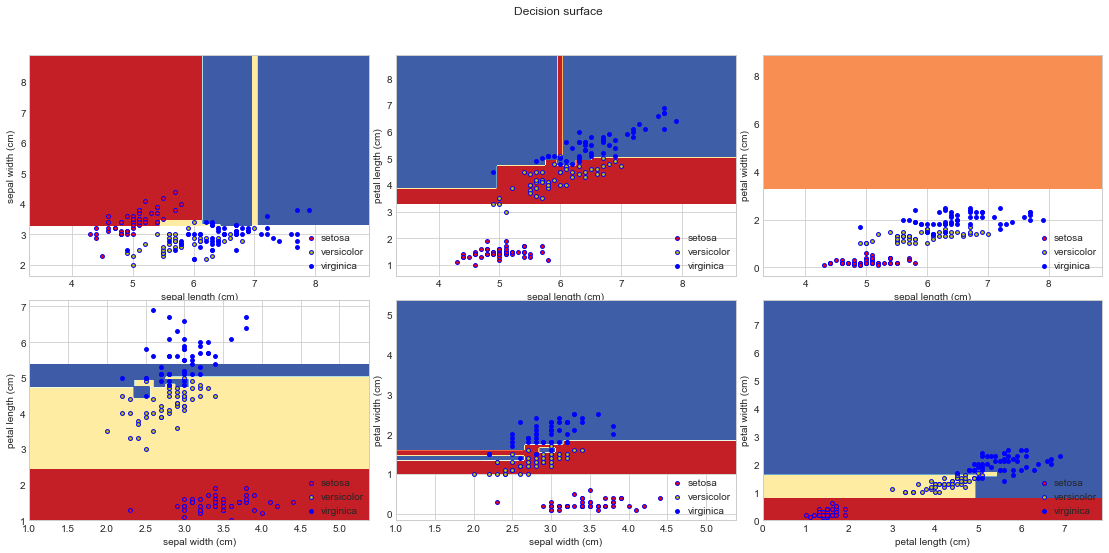

In [31]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2], [0, 3], [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor="b", s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    plt.axis("tight")

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

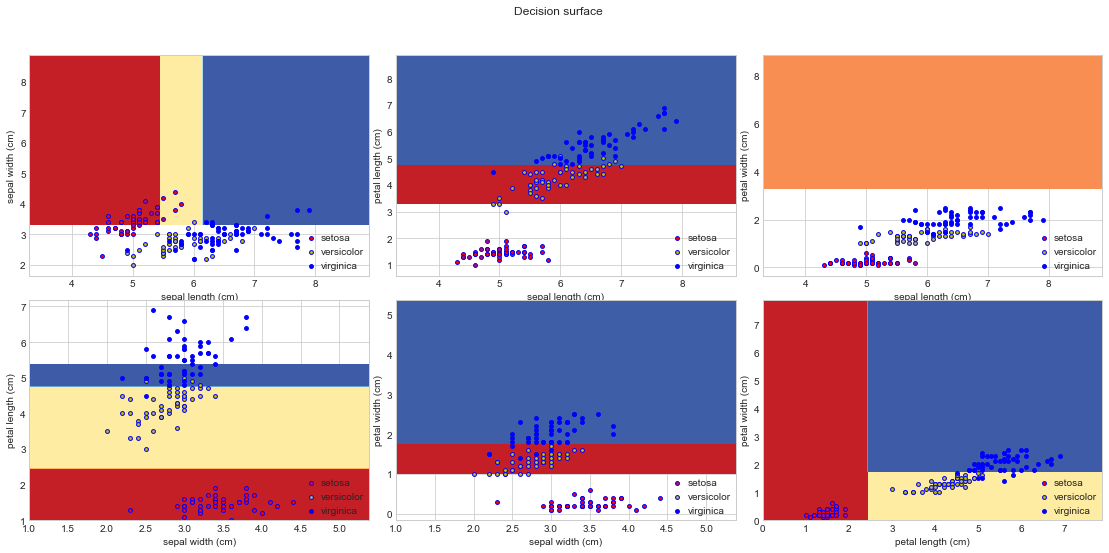

In [32]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2], [0, 3], [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor="b", s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    plt.axis("tight")

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [ ]:
model = DecisionTreeClassifier()

In [34]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=-1)

array([0.80555556, 0.80555556, 0.77777778, 0.74285714, 0.97142857])

##### 전처리 후 학습

In [35]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [36]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=-1)

array([0.91666667, 0.80555556, 0.83333333, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [41]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [43]:
r = tree.export_text(decision_tree=model, feature_names= wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- alcohol <= 13.51
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.51
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- hue <= 0.80
|   |   |   |--- class: 2
|   |   |--- hue >  0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |--- class: 0

##### plot_tree를 사용한 시각화

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 

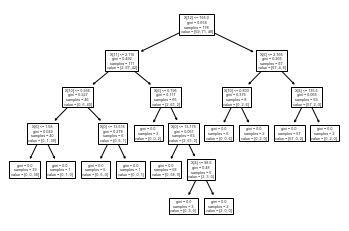

In [46]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

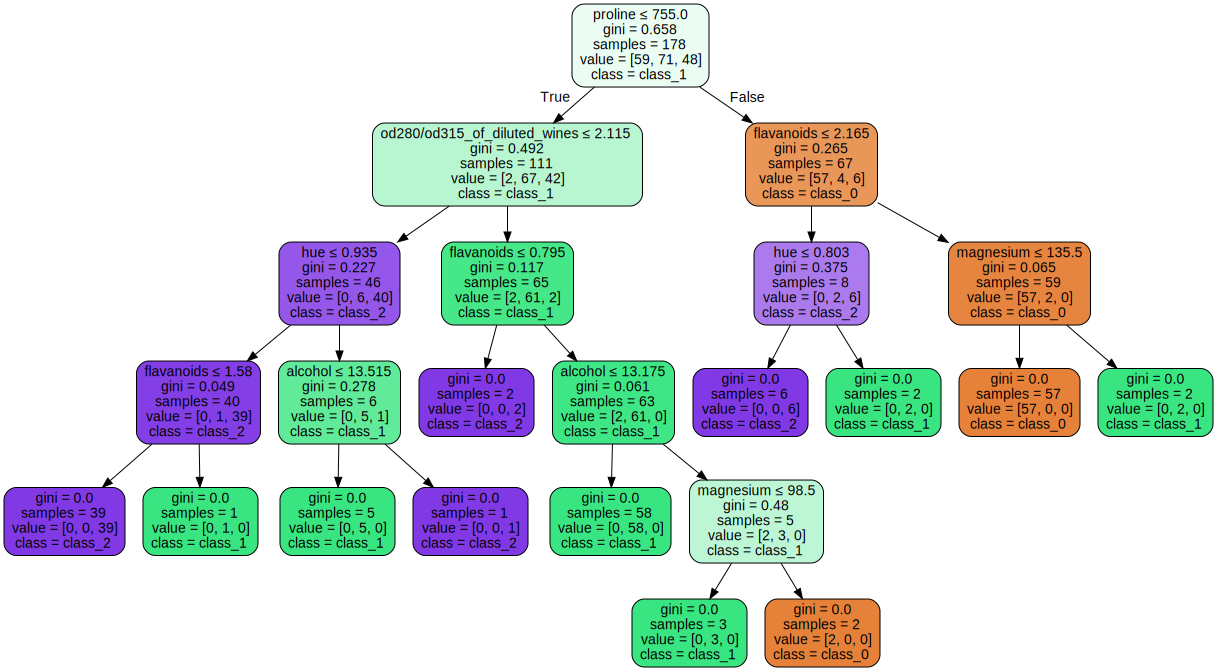

In [49]:
dot_data = tree.export_graphviz (decision_tree=model,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                 # filled : 색을 칠하는주는 것 
                                 # rounded : 모서리가 둥그렇게 출력해주는 코드 
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

##### 결정 경계 시각화

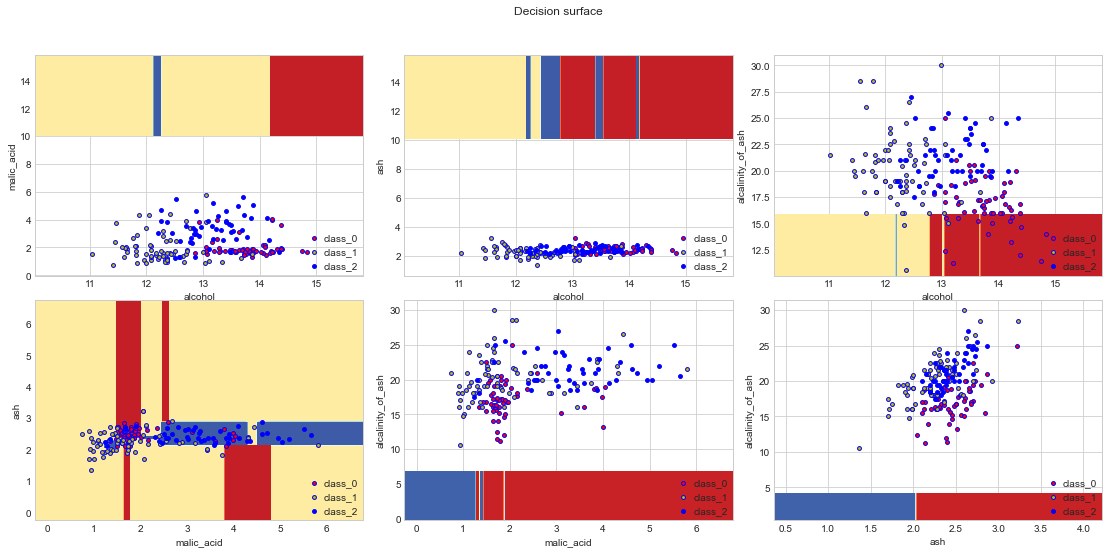

In [53]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2], [0, 3], [1,2],[1,3],[2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier(max_depth=5)
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor="b", s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    plt.axis("tight")

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [ ]:
model = DecisionTreeClassifier()

In [55]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=-1)

array([0.9122807 , 0.93859649, 0.92982456, 0.92982456, 0.91150442])

##### 전처리 후 학습

In [ ]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [56]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=-1)

array([0.9122807 , 0.90350877, 0.92982456, 0.94736842, 0.91150442])

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### plot_tree를 사용한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 결정 경계 시각화

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

##### 전처리 후 학습

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### plot_tree를 사용한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

##### 전처리 후 학습

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### plot_tree를 사용한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화